In [ ]:
import pickle
import pandas as pd
import numpy as np

: 

In [ ]:
filename = "/scratch/scholar/lu677/generated/train_test/16bits/merged_x_train_normalize"
filename_test = "/scratch/scholar/lu677/generated/train_test/16bits/merged_x_test_normalize"
def out(name):
    pd.set_option('display.max_columns', None)
    out = loadall(name)
    tmp = next(out)
    np.random.shuffle(tmp)
    an_array = tmp[0:10000]
    print(an_array)
    for i in out:
        tmp = i
        np.random.shuffle(tmp)
        an_array = np.append(an_array, tmp[0:10000], 0)
        print(i.shape)
    return an_array


def loadall(filename):
    with open(filename, "rb") as f:
        while True:
            try:
                yield pickle.load(f)
            except EOFError:
                break
a = out(filename)

[[0.0784   0.04706  0.0392   ... 0.3628   0.25     0.005634]
 [0.08234  0.0549   0.08234  ... 0.339    0.5      1.      ]
 [0.098    0.1098   0.1804   ... 0.3723   0.75     1.      ]
 ...
 [0.0353   0.0392   0.0392   ... 0.525    0.25     0.4646  ]
 [0.745    0.8433   0.4863   ... 0.734    1.       0.4646  ]
 [1.       0.757    0.757    ... 0.3352   0.5      1.      ]]
(94081, 3083)
(103171, 3083)
(92718, 3083)
(30906, 3083)
(51358, 3083)
(49086, 3083)
(70447, 3083)
(36814, 3083)
(48631, 3083)
(95899, 3083)
(55903, 3083)
(93627, 3083)
(85446, 3083)
(66811, 3083)
(68629, 3083)
(63175, 3083)
(92263, 3083)
(57267, 3083)


In [ ]:
a.shape

(190000, 3083)

In [ ]:
b = out(filename_test)

[[0.3765  0.3726  0.3215  ... 0.4858  0.25    0.04736]
 [0.02353 0.06665 0.051   ... 0.8813  0.25    0.00315]
 [0.953   0.4314  0.2     ... 0.6963  0.      0.     ]
 ...
 [0.1137  0.0392  0.2079  ... 0.314   0.75    0.1009 ]
 [0.      0.      0.      ... 0.2477  0.      0.4646 ]
 [0.1882  0.1177  0.1608  ... 0.08795 0.75    0.04736]]
(10454, 3083)
(11464, 3083)
(10302, 3083)
(3434, 3083)
(5707, 3083)
(5454, 3083)
(7828, 3083)
(4091, 3083)
(5404, 3083)
(10656, 3083)
(6212, 3083)
(10403, 3083)
(9494, 3083)
(7424, 3083)
(7626, 3083)
(7020, 3083)
(10252, 3083)
(6363, 3083)


In [ ]:
b.shape

(146057, 3083)

In [ ]:
filename_y = "/scratch/scholar/lu677/generated/train_test/32bits/merged_y_train_normalize"
filename_test_y = "/scratch/scholar/lu677/generated/train_test/32bits/merged_y_test_normalize"
a_y = out(filename_y)
b_y = out(filename_test_y)

[4.0605614e-06 4.5005202e-10 9.9971056e-01 ... 5.9244812e-05 4.2059838e-11
 6.5334199e-04]
(94081,)
(103171,)
(92718,)
(30906,)
(51358,)
(49086,)
(70447,)
(36814,)
(48631,)
(95899,)
(55903,)
(93627,)
(85446,)
(66811,)
(68629,)
(63175,)
(92263,)
(57267,)
[1.9804749e-03 7.6596153e-01 1.7072254e-05 ... 3.2997444e-02 2.0290622e-04
 7.1662669e-08]
(10454,)
(11464,)
(10302,)
(3434,)
(5707,)
(5454,)
(7828,)
(4091,)
(5404,)
(10656,)
(6212,)
(10403,)
(9494,)
(7424,)
(7626,)
(7020,)
(10252,)
(6363,)


In [ ]:
a_y = np.array([1 if num >= 0.5 else 0 for num in a_y ])
b_y = np.array([1 if num >= 0.5 else 0 for num in b_y ])

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(a, a_y)
y_pred = regr.predict(b)


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(b_y, y_pred))

Mean squared error: 0.23


In [ ]:
y_pred = np.array([1 if num >= 0.5 else 0 for num in y_pred ])
print(sum(y_pred ^ b_y) / len(b_y))

0.3588804370896294


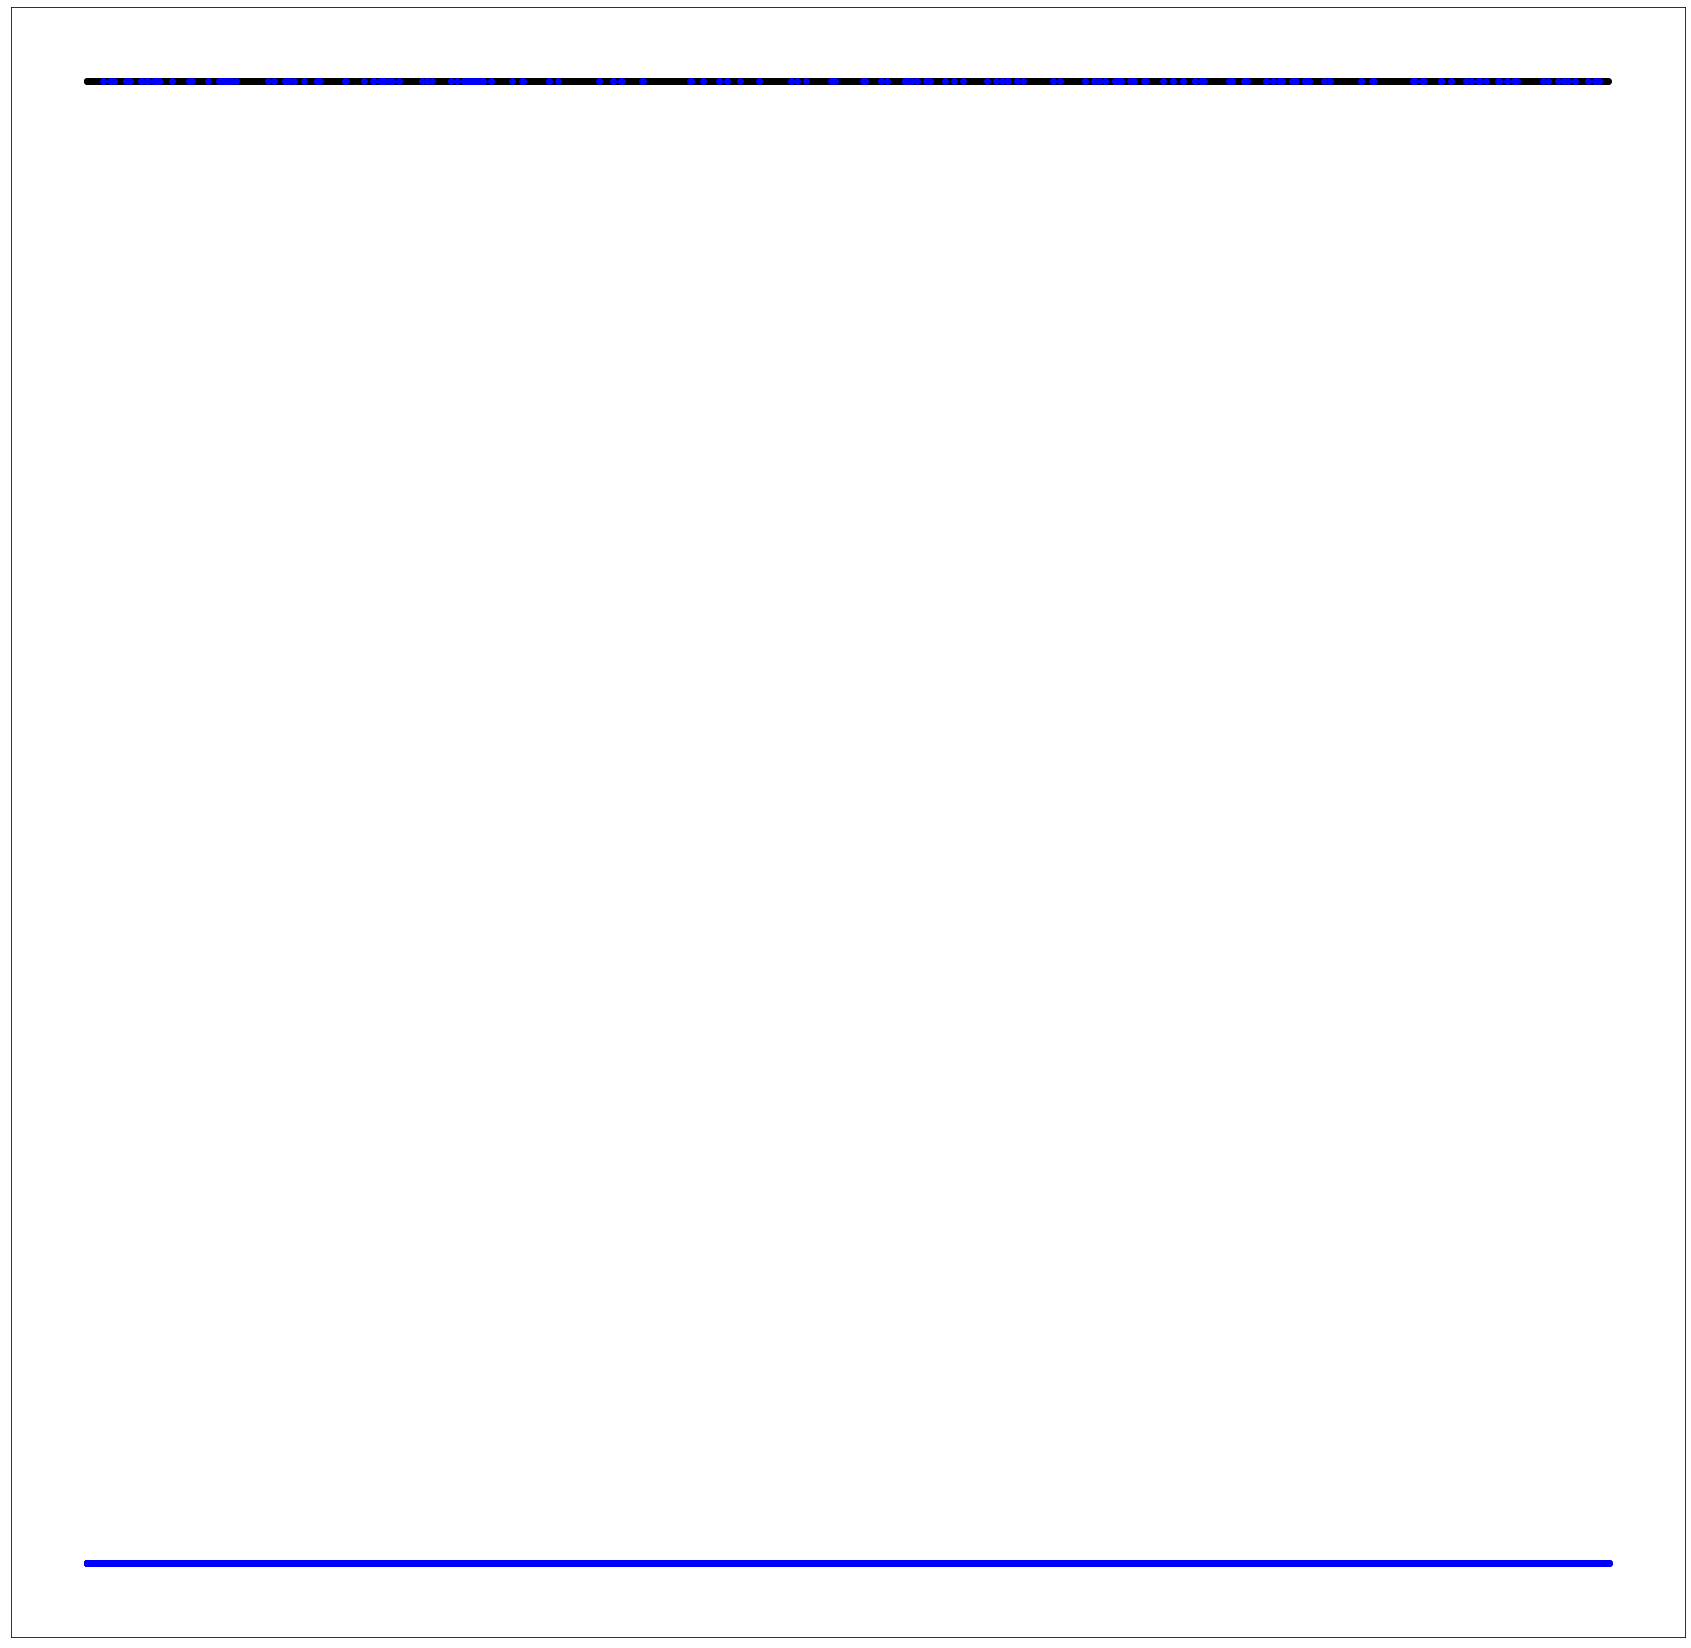

In [ ]:
plt.figure(figsize=(30, 30))
plt.scatter([i for i in range(len(b_y))][0:10000], b_y[0:10000], color="black")
plt.scatter([i for i in range(len(b_y))][0:10000], y_pred[0:10000], color="blue")

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
regr = rf
regr.fit(a, a_y)
y_pred = regr.predict(b)


In [ ]:
y_pred = np.array([1 if num >= 0.5 else 0 for num in y_pred ])
print(sum(y_pred ^ b_y) / len(b_y))

0.353389430153981


In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty="l1", tol=0.001, C=1, fit_intercept=True, solver="saga", intercept_scaling=1, random_state=42)
regr = log
regr.fit(a, a_y)
y_pred = regr.predict(b)

y_pred = np.array([1 if num >= 0.5 else 0 for num in y_pred ])
print(sum(y_pred ^ b_y) / len(b_y))

0.35925015576110697


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgbc = xgb
xgbc.fit(a, a_y)
y_pred = xgbc.predict(b)
print("Mean squared error: %.2f" % mean_squared_error(b_y, y_pred))

y_pred = np.array([1 if num >= 0.5 else 0 for num in y_pred ])
print(sum(y_pred ^ b_y) / len(b_y))


/home/wu1522/.conda/envs/cent7/5.1.0-py36/DPLClass/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean squared error: 0.37
0.3683972695591447
